Predecir la columna Cancer Present en el Dataset genes.csv

* 0: NO
* 1: Sí

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [78]:
df = pd.read_csv('../../data/genes.csv')
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


In [79]:
df.shape

(3000, 3)

In [80]:
df['Cancer Present'].value_counts()

1    1500
0    1500
Name: Cancer Present, dtype: int64

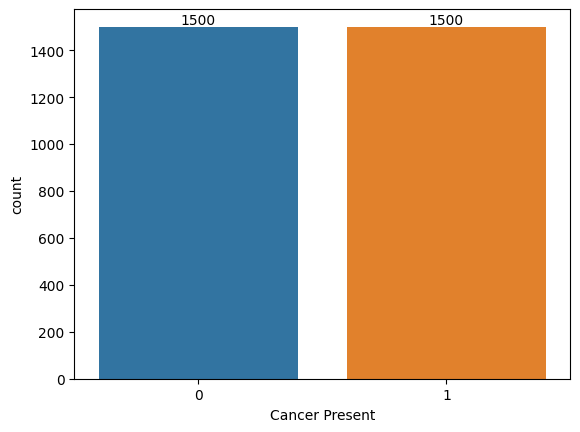

In [81]:
ax = sns.countplot(data=df, x='Cancer Present')
ax.bar_label(ax.containers[0]);

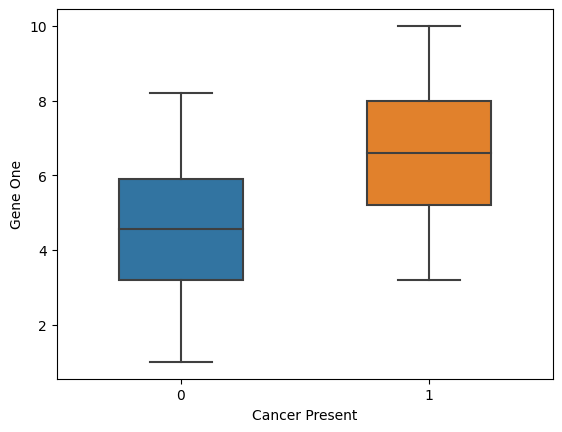

In [82]:
sns.boxplot(data=df, x='Cancer Present', y='Gene One', width=0.5);

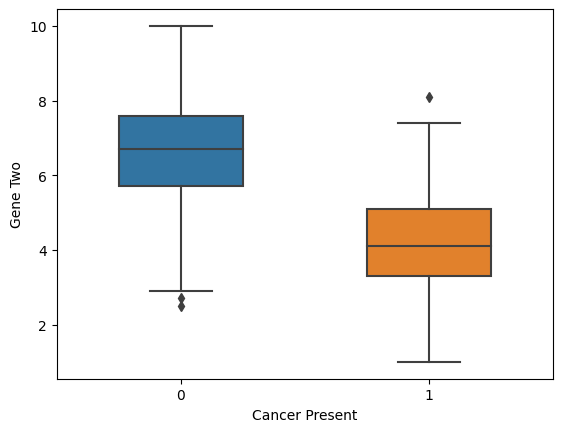

In [83]:
sns.boxplot(data=df, x='Cancer Present', y='Gene Two', width=0.5);

Text(0.5, 1.0, 'Mezcladooo, todo azúl')

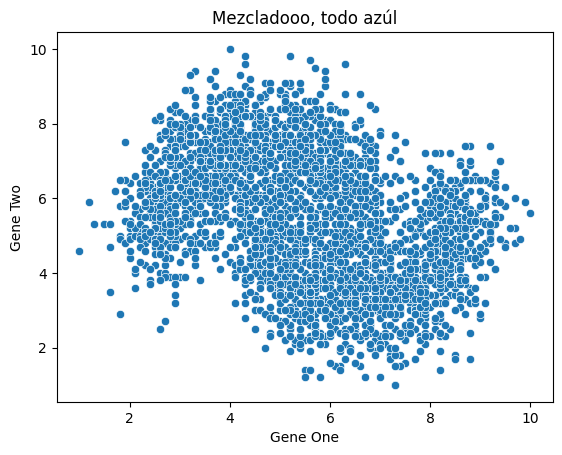

In [84]:
sns.scatterplot(data=df, x='Gene One', y='Gene Two');
plt.title('Mezcladooo, todo azúl')

Text(0.5, 1.0, 'Mezcladooo, con colores')

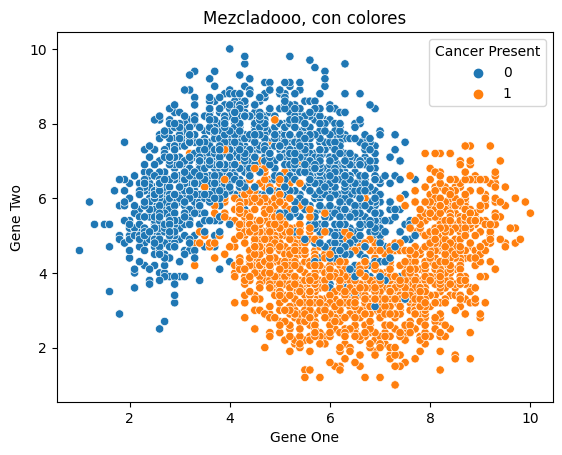

In [85]:
sns.scatterplot(data=df, x='Gene One', y='Gene Two', hue='Cancer Present')
plt.title('Mezcladooo, con colores')

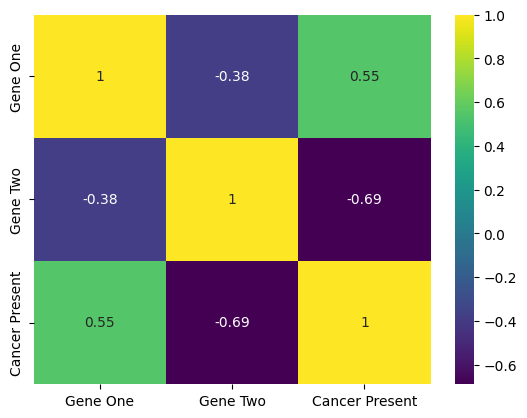

In [86]:
df_corr = df.corr(numeric_only=True).round(2)
sns.heatmap(df_corr, cmap='viridis', annot=True);

In [87]:
X = df[['Gene One', 'Gene Two']]
y = df['Cancer Present']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [88]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred[:10] # ny folo voalohany iany

array([1, 1, 1, 0, 0, 1, 0, 0, 0, 1], dtype=int64)

In [89]:
from sklearn.metrics import confusion_matrix


confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[276  52]
 [ 39 233]]


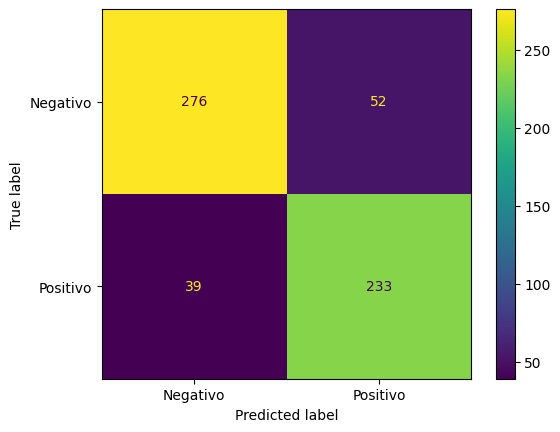

In [90]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=['Negativo', 'Positivo'])
disp = disp.plot()

In [91]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.8483333333333334

In [92]:
from sklearn.metrics import precision_score

precision_score(y_test, y_pred)

0.8175438596491228

In [93]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86       328
           1       0.82      0.86      0.84       272

    accuracy                           0.85       600
   macro avg       0.85      0.85      0.85       600
weighted avg       0.85      0.85      0.85       600



In [94]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred[:10]

array([1, 1, 1, 0, 0, 1, 1, 0, 0, 1], dtype=int64)

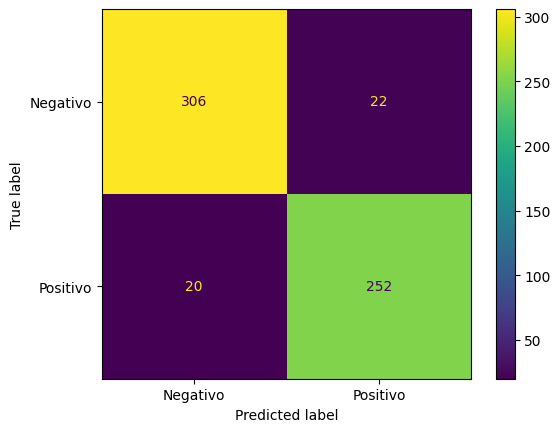

In [96]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negativo', 'Positivo'])
disp = disp.plot()

In [97]:
# La regresión logística asume una relación lineal entre los datos
# en este caso los datos son no lineales por eso tuvo peores resultados que KNN
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94       328
           1       0.92      0.93      0.92       272

    accuracy                           0.93       600
   macro avg       0.93      0.93      0.93       600
weighted avg       0.93      0.93      0.93       600



## Buscar parámetro n_neighbors

Método del codo

In [ ]:
test_error = []

# buscle for que itere de 1 a 30 probando los K vecionos de 1 a 30
# KNeighborsClassifier(n_neighbors=i
# # accuracy_score o f1_score)
# Guardamos la diferencia de 1 - accuracy
for K in range(1, 30):
    model = KNeighborsClassifier(n_neighbors=k)



In [ ]:
# plt.plot dibujar test_erros